<a href="https://colab.research.google.com/github/bronitanker/practice_data_since/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B2%D0%B7%D0%B0%D0%B8%D0%BC%D0%BE%D1%81%D0%B2%D1%8F%D0%B7%D0%B8_%D0%BA%D0%BE%D0%BB%D0%BE%D0%BD%D0%BE%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ взаимосвязи колонок

### Анализ взаимосвязи колонок делится по типу анализируемых колонок на:

1.   Анализ взаимосвязи категориальной и числовой переменных
2.   Анализ взаимосвязи двух числовых переменных
3.   Анализ взаимосвязи двух категориальных переменных 

In [1]:
!gdown --id 18yofdxO2BYBmlw8wmVHEwGFiALR2F4lC 
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('housing_market_dataset.csv') 

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=18yofdxO2BYBmlw8wmVHEwGFiALR2F4lC
To: /content/housing_market_dataset.csv
100% 29.3M/29.3M [00:00<00:00, 95.5MB/s]


## Анализ взаимосвязи категориальной и числовой переменных 

In [12]:
import re
def clear_price(price):
  return int(re.sub('\D', '', price))
dataset['Очищенная цена за м²'] = dataset['цена за м²'].apply(clear_price)

In [13]:
dataset.groupby('Класс жилья')["Очищенная цена за м²"].median() # сгруппируем датасет по клоассам жилья и у колонки  "Очищенная цена" возьмем медиану для каждой группы

Класс жилья
Бизнес класс     220000.0
Комфорт класс    115301.0
Эконом класс     154955.0
Элит класс       307432.0
Name: Очищенная цена за м², dtype: float64

In [14]:
dataset.groupby('Класс жилья')["Очищенная цена за м²"].describe() # посчитаем дополнительные характеристики

,count,mean,std,min,25%,50%,75%,max
Класс жилья,,,,,,,,
Бизнес класс,3415.0,217850.375403,55761.695478,7199.0,189125.0,220000.0,246898.5,1005747.0
Комфорт класс,1875.0,129315.616533,35933.283271,72030.0,101870.5,115301.0,156596.5,260870.0
Эконом класс,177.0,163069.536723,55864.258999,8273.0,120732.0,154955.0,200000.0,288462.0
Элит класс,345.0,373067.913043,207956.103586,86667.0,275000.0,307432.0,407305.0,2277778.0


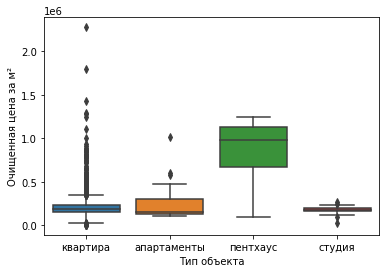

In [15]:
import seaborn as sns # используем seaborn для построения более сложных и емких графиков

sns.boxplot(x='Тип объекта', y="Очищенная цена за м²", data=dataset)
plt.show()

(-0.5, 3.5, 0.0, 1100000.0)

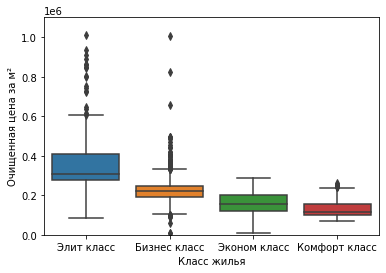

In [ ]:
sns.boxplot(x='Класс жилья', y="Очищенная цена за м²", data=dataset)
plt.axis(ymin=0, ymax=1100000) # установив лимит по оси ymin и ymax мы можем задаем размеры нашей визуализации.

## Анализ взаимосвязи двух числовых переменных

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


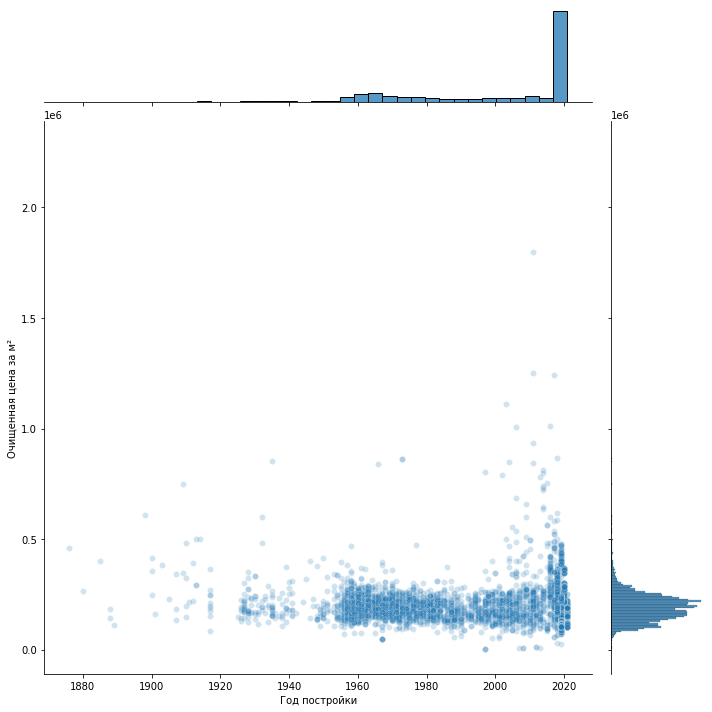

In [ ]:
sns.jointplot(x=dataset["Год постройки"], y=dataset["Очищенная цена за м²"],size=10, alpha=0.2)
plt.show()

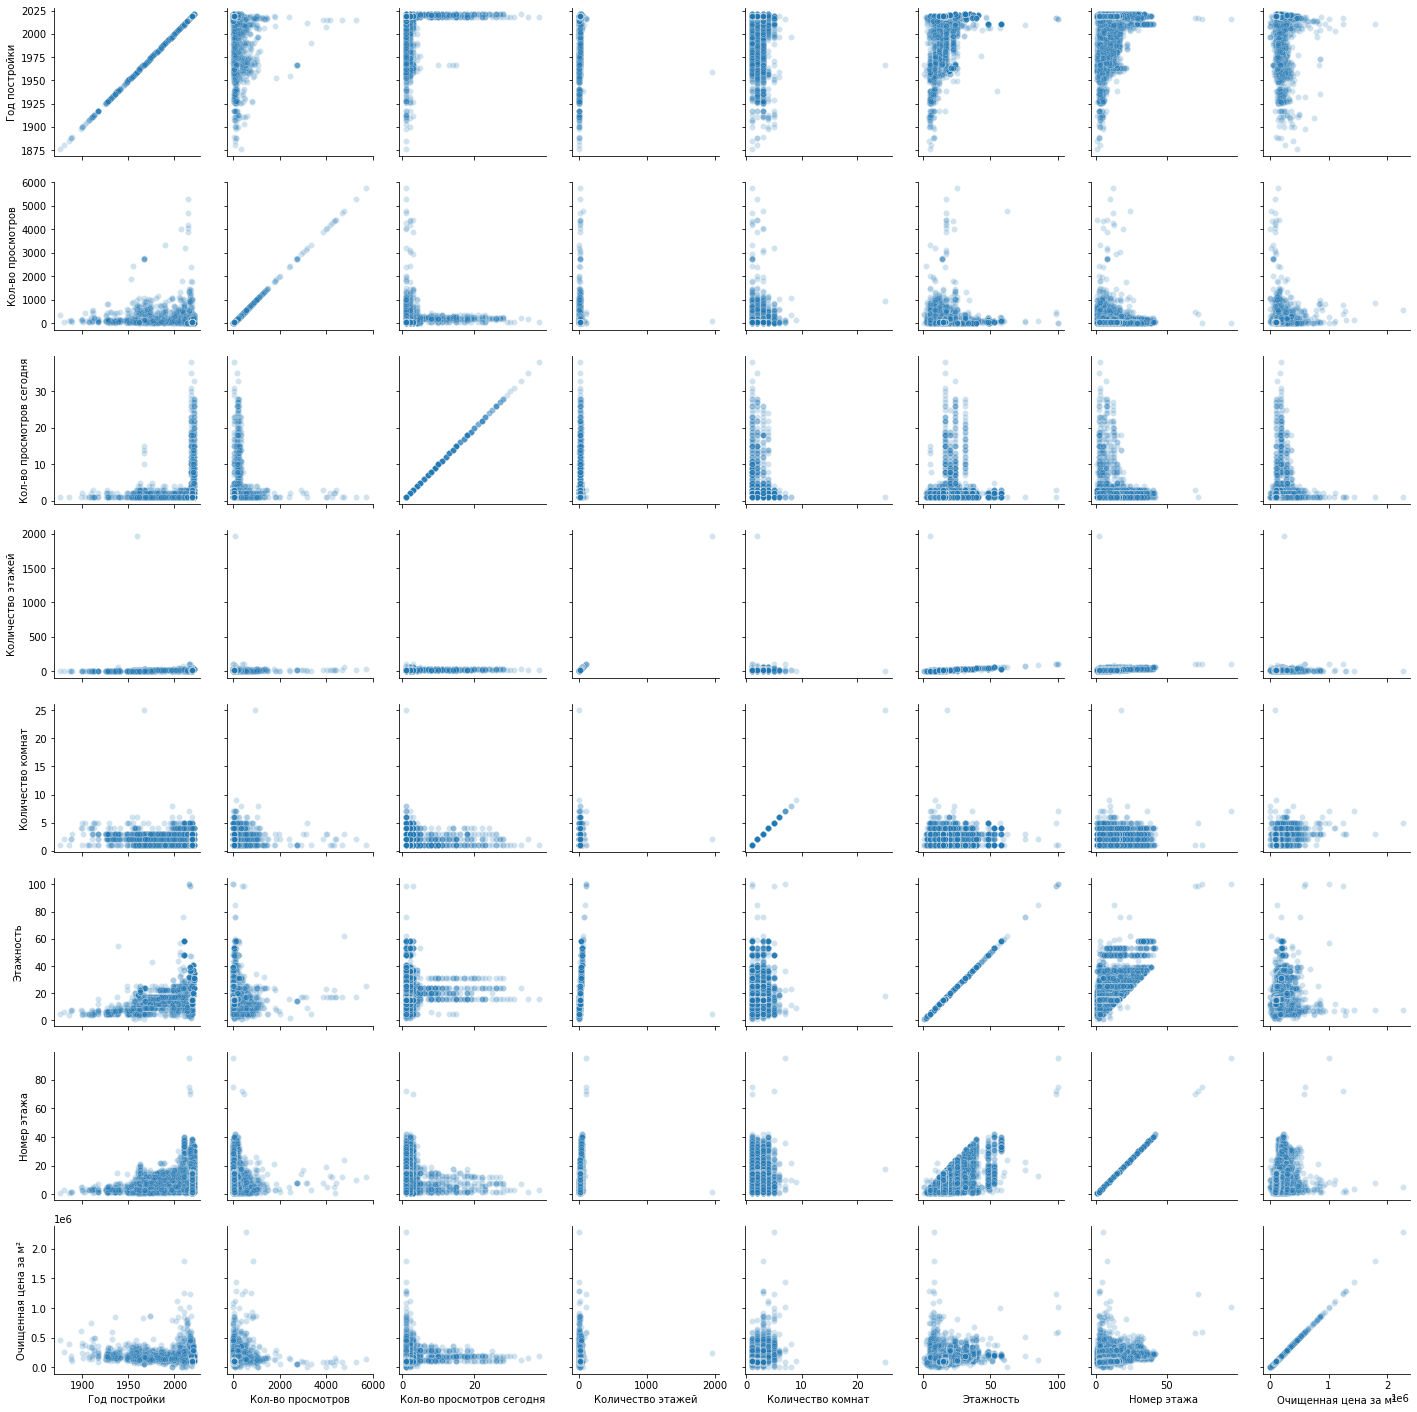

In [ ]:
g = sns.PairGrid(dataset)
g.map(sns.scatterplot, alpha=0.2)

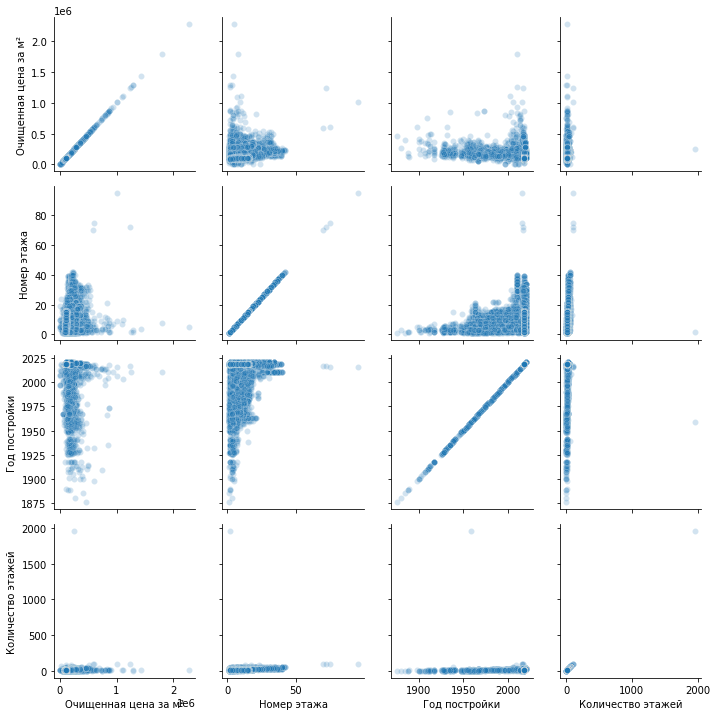

In [ ]:
columns = ['Очищенная цена за м²','Номер этажа', 'Год постройки', 'Количество этажей'] # сортируем колонки необходимые нам
g = sns.PairGrid(dataset[columns])
g.map(sns.scatterplot, alpha=0.2)

In [ ]:
new_dataset = dataset
for col in columns:
  limiter = new_dataset[col].quantile(0.99)
  new_dataset = new_dataset[new_dataset[col]<=limiter] # отфильтруем значения датасета

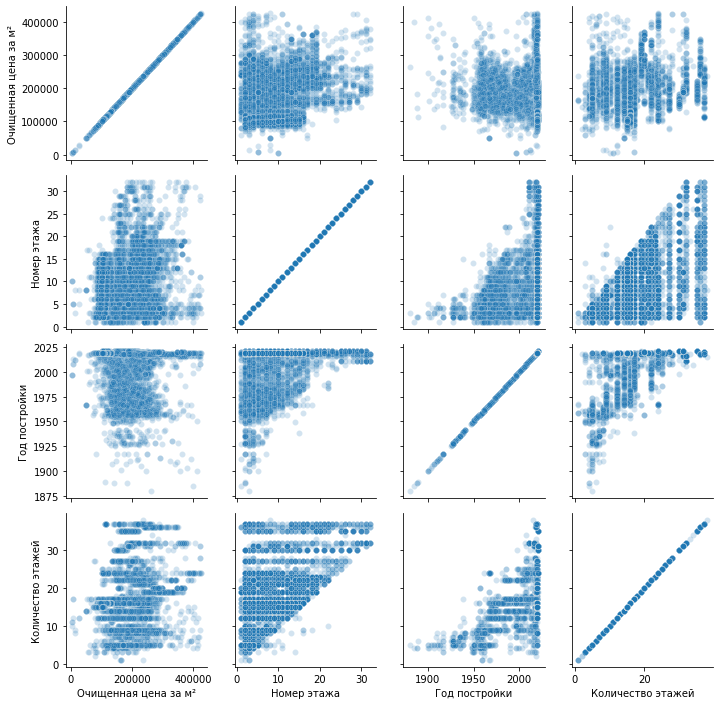

In [ ]:
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha=.2)

## Анализ взаимосвязи двух категориальных переменных

In [ ]:
flat_types = dataset['Класс жилья'].unique()
flat_types

array([nan, 'Элит класс', 'Бизнес класс', 'Эконом класс', 'Комфорт класс'],
      dtype=object)

In [ ]:
flat_types = flat_types[1:]

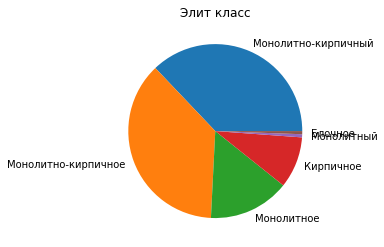

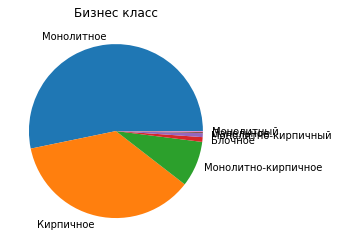

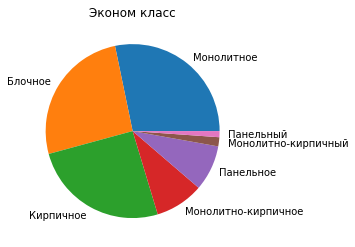

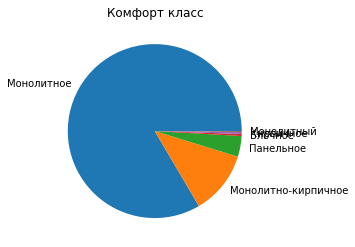

In [ ]:
import matplotlib.pyplot as plt

for flat_type in flat_types:
  df = dataset[dataset['Класс жилья']==flat_type] 

  class_counts = df['Тип здания'].value_counts()

  plt.title(flat_type)
  plt.pie(class_counts.values, labels =class_counts.index)
  plt.show()

In [ ]:
labels = dataset['Тип здания'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors

{nan: (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 'Блочное': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'Кирпичное': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Монолитно-кирпичное': (1.0, 0.596078431372549, 0.5882352941176471),
 'Монолитно-кирпичный': (0.6823529411764706,
  0.7803921568627451,
  0.9098039215686274),
 'Монолитное': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Монолитный': (1.0, 0.7333333333333333, 0.47058823529411764),
 'Панельно-кирпичное': (0.5490196078431373,
  0.33725490196078434,
  0.29411764705882354),
 'Панельное': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Панельный': (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 'Сталинское': (0.5803921568627451, 0.403921568627451, 0.7411764705882353)}

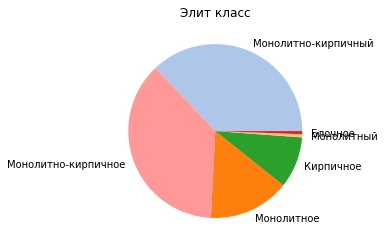

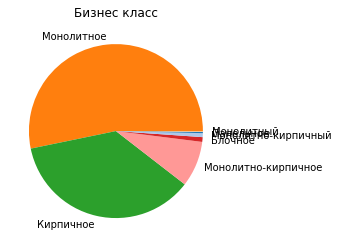

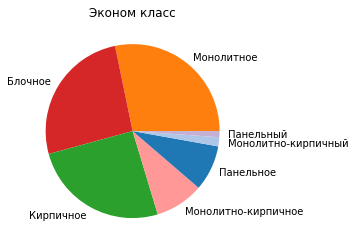

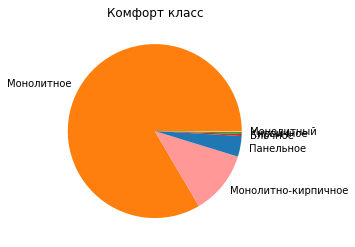

In [ ]:
import matplotlib.pyplot as plt

for flat_type in flat_types: 
  df = dataset[dataset['Класс жилья']==flat_type]

  class_counts = df['Тип здания'].value_counts()
  labels =class_counts.index

  plt.title(flat_type)
  plt.pie(class_counts.values, labels = labels, colors = [colors[key] for key in labels])
  
  plt.show()

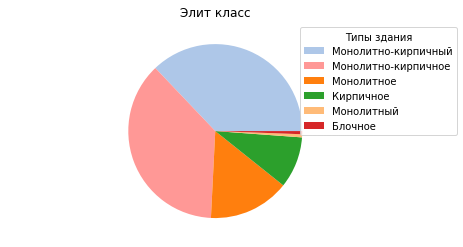

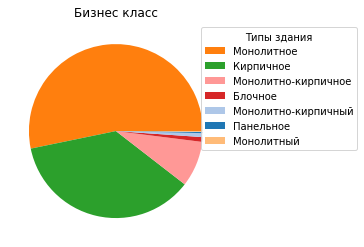

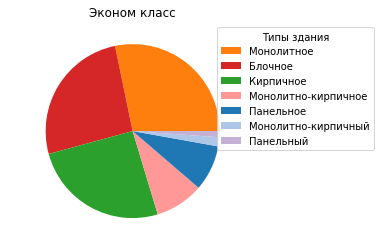

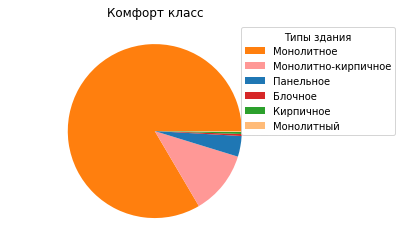

In [ ]:
import matplotlib.pyplot as plt

for flat_type in flat_types: 
  df = dataset[dataset['Класс жилья']==flat_type]

  class_counts = df['Тип здания'].value_counts()
  labels =class_counts.index

  plt.title(flat_type)
  patches, texts = plt.pie(
      class_counts.values, 
      labels = labels, 
      colors = [colors[key] for key in labels],
      textprops=dict(color="w") 
      )
  plt.legend(patches, labels, title="Типы здания", loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1)) 

  plt.show()

## Шаблоны анализа взаимосвязи колонок

In [ ]:
# Шаблона первичного анализа взаимосвязи категориальной и числовой колонок
dataset.groupby('Класс жилья')["Очищенная цена за м²"].describe()

,count,mean,std,min,25%,50%,75%,max
Класс жилья,,,,,,,,
Бизнес класс,3415.0,217850.375403,55761.695478,7199.0,189125.0,220000.0,246898.5,1005747.0
Комфорт класс,1875.0,129315.616533,35933.283271,72030.0,101870.5,115301.0,156596.5,260870.0
Эконом класс,177.0,163069.536723,55864.258999,8273.0,120732.0,154955.0,200000.0,288462.0
Элит класс,345.0,373067.913043,207956.103586,86667.0,275000.0,307432.0,407305.0,2277778.0


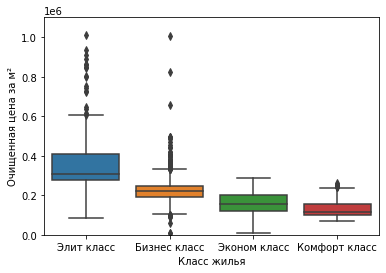

In [ ]:
# Шаблон визуального анализа взаимосвязи категориальной и числовой колонок
import seaborn as sns

sns.boxplot(x='Класс жилья', y="Очищенная цена за м²", data=dataset)
plt.axis(ymin=0, ymax=1100000) 
plt.show()

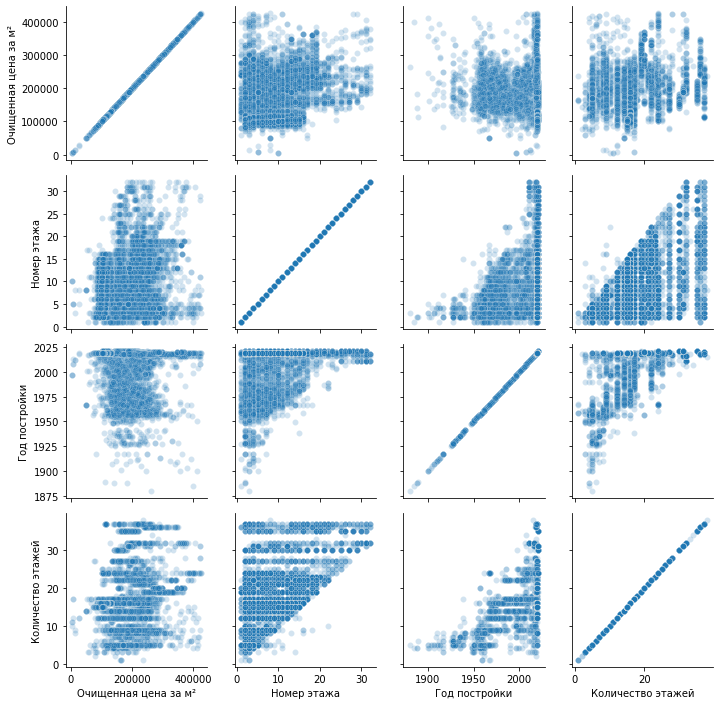

In [ ]:
# Шаблона анализа взаимосвязи двух и более числовых колонок
g = sns.PairGrid(new_dataset[columns])
g.map(sns.scatterplot, alpha=0.2)

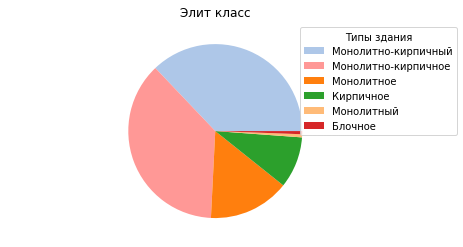

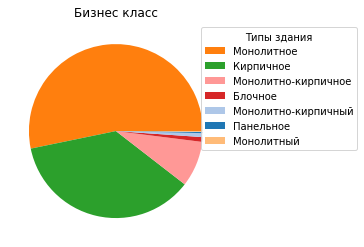

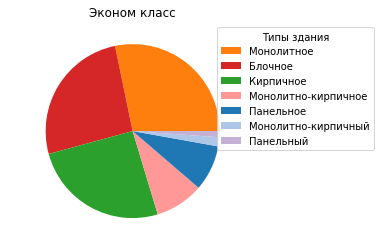

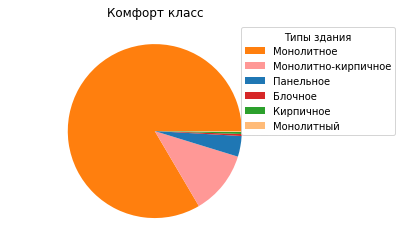

In [ ]:
# Шаблона анализа взаимосвязи двух категориальных колонок
import matplotlib.pyplot as plt


flat_types = dataset['Класс жилья'].unique()
flat_types = flat_types[1:]


labels = dataset['Тип здания'].unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))

for flat_type in flat_types: 
  df = dataset[dataset['Класс жилья']==flat_type] 

  class_counts = df['Тип здания'].value_counts()
  labels =class_counts.index

  plt.title(flat_type)
  patches, texts = plt.pie(
      class_counts.values, 
      labels = labels, 
      colors = [colors[key] for key in labels],
      textprops=dict(color="w")
      )

  plt.legend(patches, labels, title="Типы здания", loc="upper center", bbox_to_anchor=(1, 0, 0.5, 1)) 

  plt.show()

[Еще много шаблонов анализа взимосвязи и не только на основе matplotlib](https://habr.com/ru/post/468295/)